# Loading processed methylation data and checking beta distributions

## Loading Beta Values and Metadata

We will continue working with the dataset referenced in the `methylprep` general walkthrough: [GSE147391]((https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE147391)). It was processed from the command line with the following command:

```shell
>>> python -m methylprep process -d <filepath> --all
```

Where ``<filepath>`` is the directory where the raw IDAT files are stored. We use `--all` to tell `methylprep` to give us all the possible output files, which include: 

- beta_values.pkl
- poobah_values.pkl
- control_probes.pkl
- m_values.pkl
- noob_meth_values.pkl
- noob_unmeth_values.pkl
- meth_values.pkl
- unmeth_values.pkl
- sample_sheet_meta_data.pkl

As well as folders that contain the processed methylation data in .csv files. 


In [30]:
import methylcheck
from pathlib import Path
filepath = Path('/Users/patriciagirardi/tutorial/GPL21145')

betas = methylcheck.load(filepath)
betas.head()

Files: 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]
INFO:methylcheck.load_processed:loaded data (865859, 16) from 1 pickled files (0.217s)


,203163220027_R01C01,203163220027_R02C01,203163220027_R03C01,203163220027_R04C01,203163220027_R05C01,203163220027_R06C01,203163220027_R07C01,203163220027_R08C01,203175700025_R01C01,203175700025_R02C01,203175700025_R03C01,203175700025_R04C01,203175700025_R05C01,203175700025_R06C01,203175700025_R07C01,203175700025_R08C01
IlmnID,,,,,,,,,,,,,,,,
cg00000029,0.852,0.749,0.739,NaN,0.891,0.896,0.757,0.734,0.806,0.881,0.740,0.885,0.693,0.779,0.617,0.891
cg00000103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg00000109,0.943,0.916,0.884,0.951,0.936,0.774,0.932,0.920,0.898,0.938,0.931,0.953,0.899,0.889,0.734,0.892
cg00000155,0.960,0.962,0.958,0.958,0.963,0.959,0.965,0.969,0.959,0.956,0.964,0.961,0.959,0.967,0.961,0.960
cg00000158,0.969,0.972,0.971,0.968,0.968,0.964,0.970,0.974,0.964,0.969,0.960,0.968,0.965,0.965,0.975,0.966


You may also use `methylcheck.load_both()` to load both the beta values and metadata at the same time. Note that `methylcheck` expects the formatting used by `methylprep` in this command.

In [27]:
df, meta = methylcheck.load_both(filepath)
meta.head()

INFO:methylcheck.load_processed:Found several meta_data files; attempting to match each with its respective beta_values files in same folders.
INFO:methylcheck.load_processed:Multiple meta_data found. Only loading the first file.
INFO:methylcheck.load_processed:Loading 16 samples.
Files: 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]
INFO:methylcheck.load_processed:loaded data (865859, 16) from 1 pickled files (0.215s)
INFO:methylcheck.load_processed:Transposed data and reordered meta_data so sample ordering matches.
INFO:methylcheck.load_processed:meta.Sample_IDs match data.index (OK)


,GSM_ID,Sample_Name,Sentrix_ID,Sentrix_Position,source,histological diagnosis,gender,description,Sample_ID
2,GSM4429898,Grade II rep3,203163220027,R01C01,Resected glioma,Diffuse astrocytoma (II),Female,Glioma,203163220027_R01C01
3,GSM4429899,Grade III rep1,203163220027,R02C01,Resected glioma,Anaplastic astrocytoma (III),Male,Glioma,203163220027_R02C01
12,GSM4429908,Grade IV rep5,203163220027,R03C01,Resected glioma,Glioblastoma (IV),Female,Glioma,203163220027_R03C01
15,GSM4429911,Grade IV rep8,203163220027,R04C01,Resected glioma,Glioblastoma (IV),Female,Glioma,203163220027_R04C01
6,GSM4429902,Grade II rep6,203163220027,R05C01,Resected glioma,Oligodendroglioma (II),Male,Glioma,203163220027_R05C01


## Loading Other Types of Data

Formats supported by ```methylcheck.load()``` are: 

    [‘beta_value’, ‘m_value’, ‘meth’, ‘meth_df’, ‘noob_df’, ‘sesame’, ‘beta_csv’] 
    
where ‘beta_value’ is the default.

In [17]:
# the unnormalized probe values
(meth,unmeth) = methylcheck.load(filepath, format='meth_df')
meth.head()

100%|██████████| 16/16 [00:00<00:00, 1249.63it/s]
INFO:methylcheck.load_processed:(865859, 16) (865859, 16)


,203163220027_R01C01,203163220027_R02C01,203163220027_R03C01,203163220027_R04C01,203163220027_R05C01,203163220027_R06C01,203163220027_R07C01,203163220027_R08C01,203175700025_R01C01,203175700025_R02C01,203175700025_R03C01,203175700025_R04C01,203175700025_R05C01,203175700025_R06C01,203175700025_R07C01,203175700025_R08C01
IlmnID,,,,,,,,,,,,,,,,
cg00000029,933.0,874.0,845.0,528.0,1579.0,1243.0,893.0,741.0,1016.0,1272.0,1035.0,1423.0,917.0,904.0,743.0,1386.0
cg00000103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg00000109,2597.0,2428.0,2309.0,3082.0,2542.0,2382.0,2710.0,1930.0,2029.0,2551.0,2385.0,3010.0,2219.0,1716.0,2132.0,2158.0
cg00000155,3491.0,4397.0,3956.0,4059.0,4314.0,4059.0,4403.0,4302.0,3865.0,3734.0,4996.0,5297.0,3787.0,5216.0,4389.0,4404.0
cg00000158,5556.0,5534.0,5384.0,4833.0,5381.0,6078.0,5678.0,4738.0,4938.0,4690.0,5658.0,6767.0,6030.0,5780.0,6300.0,5050.0


In [18]:
# noob-normalized probe values
(noob_meth,noob_unmeth) = methylcheck.load(filepath, format='noob_df')
noob_meth.head()

100%|██████████| 16/16 [00:00<00:00, 1139.68it/s]
INFO:methylcheck.load_processed:(865859, 16), (865859, 16)


,203163220027_R01C01,203163220027_R02C01,203163220027_R03C01,203163220027_R04C01,203163220027_R05C01,203163220027_R06C01,203163220027_R07C01,203163220027_R08C01,203175700025_R01C01,203175700025_R02C01,203175700025_R03C01,203175700025_R04C01,203175700025_R05C01,203175700025_R06C01,203175700025_R07C01,203175700025_R08C01
IlmnID,,,,,,,,,,,,,,,,
cg00000029,1174.0,1123.0,973.0,NaN,1745.0,1355.0,1074.0,812.0,1342.0,1497.0,1286.0,1696.0,1018.0,956.0,820.0,1524.0
cg00000103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg00000109,3372.0,3003.0,2728.0,3645.0,2950.0,2766.0,3160.0,2185.0,2684.0,3191.0,2902.0,3526.0,2488.0,1883.0,2384.0,2368.0
cg00000155,4647.0,5488.0,4754.0,4858.0,5390.0,5019.0,5198.0,5042.0,5300.0,4875.0,6244.0,6430.0,4254.0,6116.0,4892.0,5048.0
cg00000158,7810.0,7100.0,6721.0,5904.0,6912.0,7875.0,6893.0,5625.0,6925.0,6278.0,7188.0,8478.0,7100.0,6859.0,7247.0,5887.0


In [19]:
# m_values
m_values = methylcheck.load(filepath, format='m_value')
m_values.head()

Files: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]
INFO:methylcheck.load_processed:loaded data (865859, 16) from 1 pickled files (0.214s)


,203163220027_R01C01,203163220027_R02C01,203163220027_R03C01,203163220027_R04C01,203163220027_R05C01,203163220027_R06C01,203163220027_R07C01,203163220027_R08C01,203175700025_R01C01,203175700025_R02C01,203175700025_R03C01,203175700025_R04C01,203175700025_R05C01,203175700025_R06C01,203175700025_R07C01,203175700025_R08C01
IlmnID,,,,,,,,,,,,,,,,
cg00000029,2.525,1.579,1.500,NaN,3.028,3.109,1.643,1.466,2.055,2.890,1.508,2.940,1.175,1.819,0.685,3.027
cg00000103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg00000109,4.047,3.444,2.930,4.269,3.875,1.775,3.780,3.516,3.133,3.912,3.748,4.358,3.162,3.008,1.468,3.045
cg00000155,4.582,4.681,4.528,4.518,4.717,4.538,4.797,4.960,4.564,4.444,4.738,4.606,4.547,4.885,4.641,4.567
cg00000158,4.960,5.135,5.042,4.928,4.909,4.748,4.996,5.238,4.746,4.958,4.568,4.920,4.788,4.795,5.284,4.844


Note: If you point to a folder with multiple batches of samples, of different array types, you’ll get an error. All samples in the path you choose need to have the same number of probes (same array type). Here is the message you'll get in this scenario.

```ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 226618 and the array at index 1 has size 244827```

This shouldn't happen if you download and process data using `methylprep` (which will automatically detect array types and create separate folders for each array type). If you didn't process with `methylprep`, the workaround is manually moving the files from different array-types into separate folders and loading them separately.

## Loading Data from .csv Files

`methylcheck` assumes you want to load data the fastest way, using a single high-performance python3 pickled dataframe. But there are times when you want to load from CSV output files instead. One use case is where you want to examine probes that were filtered out by poobah (p-value probe detection). The CSVs contain this information, whereas the pickled dataframe has it removed by default.

In [25]:
df = methylcheck.load(filepath, format='beta_csv')
df

Files: 100%|██████████| 16/16 [00:19<00:00,  1.24s/it]
INFO:methylcheck.load_processed:merging...
100%|██████████| 16/16 [00:00<00:00, 542.04it/s]


,203163220027_R02C01,203163220027_R06C01,203163220027_R08C01,203163220027_R03C01,203163220027_R07C01,203163220027_R04C01,203163220027_R01C01,203163220027_R05C01,203175700025_R02C01,203175700025_R06C01,203175700025_R08C01,203175700025_R03C01,203175700025_R07C01,203175700025_R04C01,203175700025_R01C01,203175700025_R05C01
IlmnID,,,,,,,,,,,,,,,,
cg00000029,0.749,0.896,0.734,0.739,0.757,NaN,0.852,0.891,0.881,0.779,0.891,0.740,0.617,0.885,0.806,0.693
cg00000103,0.922,0.950,0.654,0.931,0.712,0.924,0.943,0.931,0.943,0.920,0.731,0.809,0.611,0.365,0.946,0.934
cg00000109,0.916,0.774,0.920,0.884,0.932,0.951,0.943,0.936,0.938,0.889,0.892,0.931,0.734,0.953,0.898,0.899
cg00000155,0.962,0.959,0.969,0.958,0.965,0.958,0.960,0.963,0.956,0.967,0.960,0.964,0.961,0.961,0.959,0.959
cg00000158,0.972,0.964,0.974,0.971,0.970,0.968,0.969,0.968,0.969,0.965,0.966,0.960,0.975,0.968,0.964,0.965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rs9363764,0.544,0.544,0.592,0.062,0.058,0.431,0.962,0.036,0.046,0.562,0.046,0.054,0.541,0.551,0.971,0.966
rs939290,0.055,0.591,0.974,0.051,0.965,0.809,0.966,0.070,0.964,0.578,0.601,0.535,0.625,0.603,0.962,0.965
rs951295,0.557,0.032,0.566,0.515,0.955,0.966,0.548,0.975,0.024,0.073,0.556,0.035,0.974,0.523,0.029,0.949


## Checking Beta Distributions

One of the first steps users should take when loading their data is examining the beta distribution and ensuring that the expected bimodal distribution is present. Samples whose beta distributions don't fit the bimodal distribution are more likely to be poor quality samples that need to be filtered out (you may be expecting a different distribution based on what kind of data you're looking at, of course, but the standard is bimodal with peaks around 0 and 1). 

`methylcheck` includes a beta density plot function that is similar to `seaborn`'s kde plot. If the sample size is small enough (<30), sample names will be included in the legend of the plot, so you may identify outlier samples easily. 

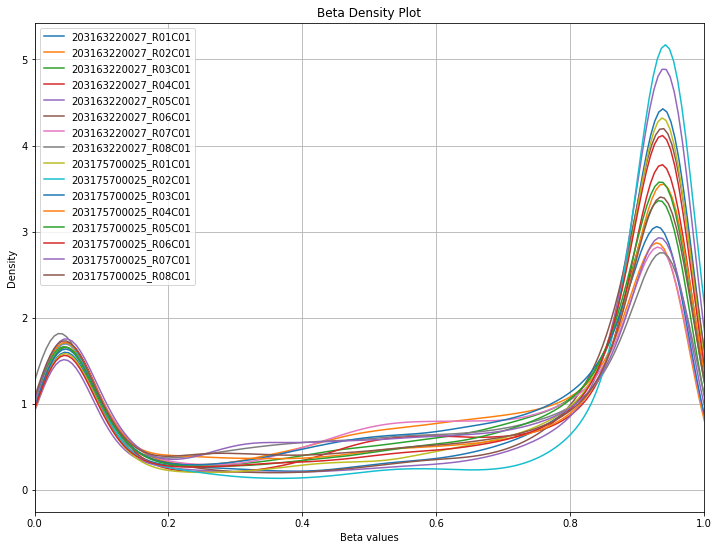

In [31]:
methylcheck.beta_density_plot(df)

This data looks relatively clean! Most data on GEO should be high quality, but it always pays to check. 

You may also want to get an idea of the mean beta distribution (useful for comparing multiple datasets, or for looking at a dataset before/after quality control measures.) Check the filtering probes section for examples on comparing beta distributions and what filtering can do to your data's mean beta distribution. 

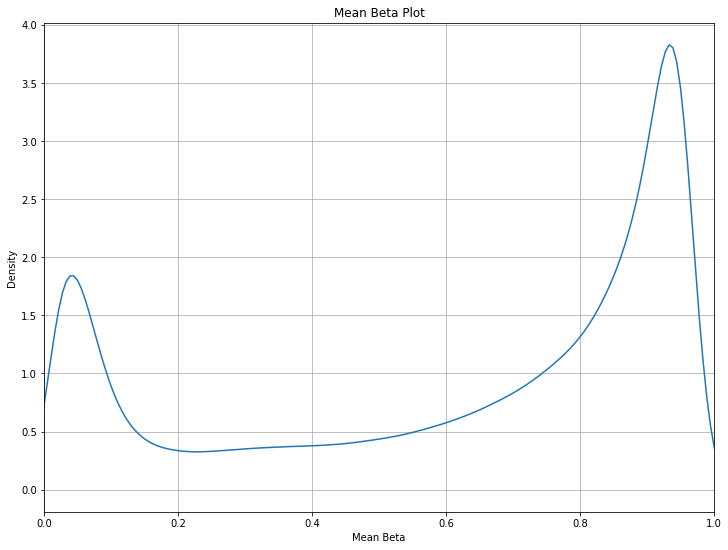

In [32]:
methylcheck.mean_beta_plot(df)